In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('thoi_trang_nam.csv')
data.head()

,Unnamed: 0,product_id,category,sub_category,user,rating,comment
0,0,0,Thời Trang Nam,Áo Ba Lỗ,karmakyun2nd,5,kiểm
1,1,0,Thời Trang Nam,Áo Ba Lỗ,tranquangvinh_vv,5,cho_phép sơ_suất hát hoạt_động rõ_ràng saisĩ
2,2,0,Thời Trang Nam,Áo Ba Lỗ,nguyenquoctoan2005,5,vừa_vặn nâu dày đỏ trắng đỏ cổ đẹp nhức đẹp lắ...
3,3,0,Thời Trang Nam,Áo Ba Lỗ,nguyenthuyhavi,5,đầu_shop hợp
4,4,0,Thời Trang Nam,Áo Ba Lỗ,luonganh5595,5,đẹp form đẹp hàng thích


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537950 entries, 0 to 537949
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    537950 non-null  int64 
 1   product_id    537950 non-null  int64 
 2   category      537950 non-null  object
 3   sub_category  537950 non-null  object
 4   user          537950 non-null  object
 5   rating        537950 non-null  int64 
 6   comment       455985 non-null  object
dtypes: int64(3), object(4)
memory usage: 28.7+ MB


In [4]:
data = data.dropna()

In [5]:
data.reset_index(drop=True, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455985 entries, 0 to 455984
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    455985 non-null  int64 
 1   product_id    455985 non-null  int64 
 2   category      455985 non-null  object
 3   sub_category  455985 non-null  object
 4   user          455985 non-null  object
 5   rating        455985 non-null  int64 
 6   comment       455985 non-null  object
dtypes: int64(3), object(4)
memory usage: 24.4+ MB


In [7]:
data = data[['rating', 'comment']]

In [8]:
data.rating.value_counts()

5    332129
4     53165
3     30870
1     25795
2     14026
Name: rating, dtype: int64

In [9]:
data.rating.shape[0]

455985

In [10]:
y_class = {4:3, 5:3, 1:1, 2:1, 3:2}
data['class'] = [y_class[i] for i in data.rating]

In [11]:
data.head()

,rating,comment,class
0,5,kiểm,3
1,5,cho_phép sơ_suất hát hoạt_động rõ_ràng saisĩ,3
2,5,vừa_vặn nâu dày đỏ trắng đỏ cổ đẹp nhức đẹp lắ...,3
3,5,đầu_shop hợp,3
4,5,đẹp form đẹp hàng thích,3


### Word Cloud

In [12]:
data_like = data[data.rating >= 4] 

In [13]:
data_like.shape

(385294, 3)

In [14]:
data_not_like = data[data.rating <= 2]

In [15]:
data_not_like.shape

(39821, 3)

In [16]:
data_neutral = data[data.rating == 3]

In [17]:
data_neutral.shape

(30870, 3)

In [18]:
from wordcloud import WordCloud

#### Like

In [19]:
wc_like = WordCloud(background_color = 'black', 
                   max_words = 500)
# Generate the wordcloud
wc_like.generate(str(data_like['comment'].values))

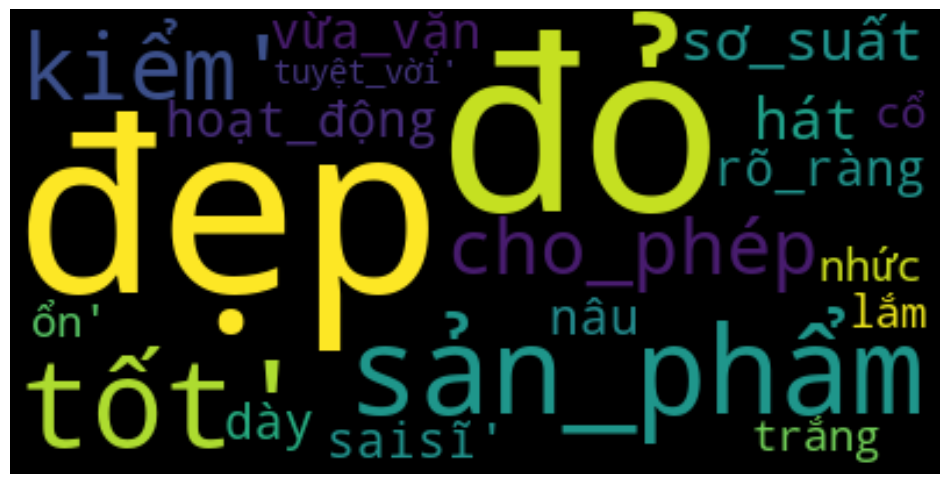

In [20]:
# Display the wordcloud
plt.figure(figsize = (12,12))
plt.imshow(wc_like, interpolation = 'bilinear')
plt.axis('off')
plt.show()

#### Not Like

In [21]:
wc_notlike = WordCloud(background_color = 'black', 
                   max_words = 500)
# Generate the wordcloud
wc_notlike.generate(str(data_not_like['comment'].values))

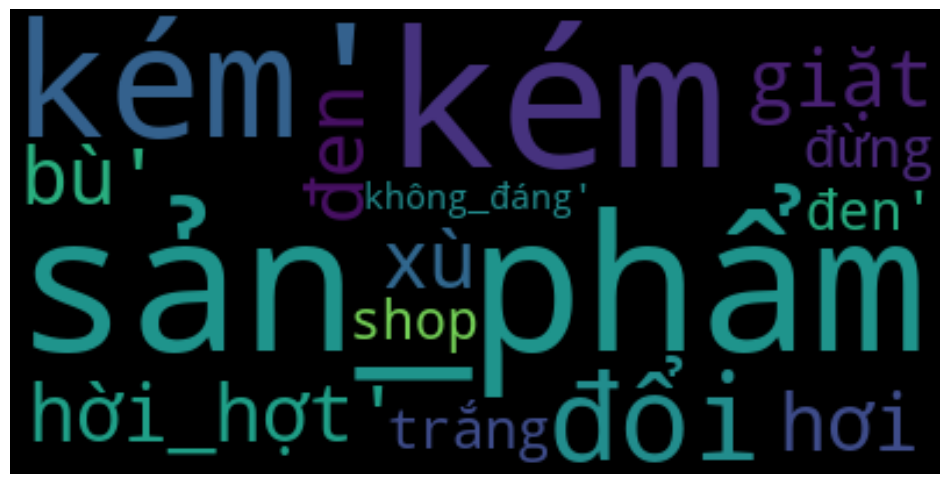

In [22]:
# Display the wordcloud
plt.figure(figsize = (12,12))
plt.imshow(wc_notlike, interpolation = 'bilinear')
plt.axis('off')
plt.show()

#### Neutral

In [23]:
wc_neutral = WordCloud(background_color = 'black', 
                   max_words = 500)
# Generate the wordcloud
wc_neutral.generate(str(data_neutral['comment'].values))

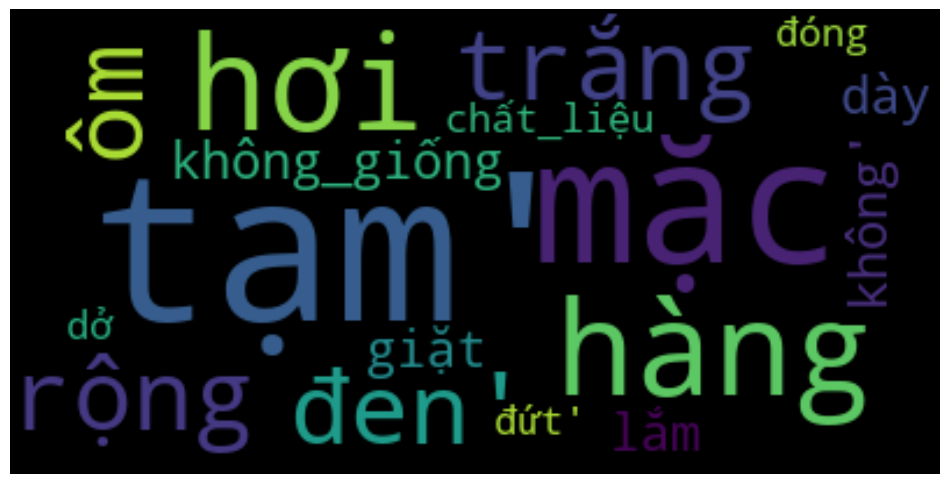

In [24]:
# Display the wordcloud
plt.figure(figsize = (12,12))
plt.imshow(wc_neutral, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Build Model

In [25]:
# X, y
X = data['comment']
y = data['class']

In [26]:
X.head()

0                                                 kiểm
1         cho_phép sơ_suất hát hoạt_động rõ_ràng saisĩ
2    vừa_vặn nâu dày đỏ trắng đỏ cổ đẹp nhức đẹp lắ...
3                                         đầu_shop hợp
4                              đẹp form đẹp hàng thích
Name: comment, dtype: object

In [27]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: class, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [29]:
X_train.head()

61438                              tịn thừa rẻ
258419                                đóng đẹp
299514                                chật tốt
423416                                    cứng
370419    đẹp lần_shop nhầm chán hơi thất_vọng
Name: comment, dtype: object

### Model selection

In [30]:
# Import classification models: KNN, Logistic Regression, Decision Tree, Random Forest, SVC, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score
from datetime import datetime

### Naive bayes

In [31]:
pipe_line = Pipeline([
    ('vect', CountVectorizer()), # bag-of-words
    ('tfidf', TfidfTransformer()), # tf-idf
    ('model', MultinomialNB()) # model naive bayes
])

In [32]:
pipe_line.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [33]:
pipe_line.score(X_train, y_train)

0.8951498955164495

In [34]:
pipe_line.score(X_test, y_test)

0.8915099856720957

In [35]:
y_testhat = pipe_line.predict(X_test)

In [36]:
# Xem kết quả thống kê
print(confusion_matrix(y_test, y_testhat))
print(classification_report(y_test, y_testhat))

[[  5865     88   6212]
 [   582   1931   6789]
 [   704    466 114159]]
              precision    recall  f1-score   support

           1       0.82      0.48      0.61     12165
           2       0.78      0.21      0.33      9302
           3       0.90      0.99      0.94    115329

    accuracy                           0.89    136796
   macro avg       0.83      0.56      0.63    136796
weighted avg       0.88      0.89      0.87    136796



### Logistic Regression

In [37]:
pipe_line = Pipeline([
    ('vect', CountVectorizer()), # bag-of-words
    ('tfidf', TfidfTransformer()), # tf-idf
    ('model', LogisticRegression()) # model Logistic Regression
])

In [38]:
pipe_line.fit(X_train, y_train)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression())])

In [39]:
pipe_line.score(X_train, y_train)

0.9046333050324415

In [40]:
pipe_line.score(X_test, y_test)

0.8999020439194129

In [41]:
y_testhat = pipe_line.predict(X_test)

In [42]:
# Xem kết quả thống kê
print(confusion_matrix(y_test, y_testhat))
print(classification_report(y_test, y_testhat))

[[  7473    227   4465]
 [  1258   2623   5421]
 [  1450    872 113007]]
              precision    recall  f1-score   support

           1       0.73      0.61      0.67     12165
           2       0.70      0.28      0.40      9302
           3       0.92      0.98      0.95    115329

    accuracy                           0.90    136796
   macro avg       0.79      0.63      0.67    136796
weighted avg       0.89      0.90      0.89    136796



### Random Forest Classifier

In [43]:
pipe_line = Pipeline([
    ('vect', CountVectorizer()), # bag-of-words
    ('tfidf', TfidfTransformer()), # tf-idf
    ('model', RandomForestClassifier()) # model Random Forest Classifier
])

In [44]:
pipe_line.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', RandomForestClassifier())])

In [45]:
pipe_line.score(X_train, y_train)

0.9638991318623136

In [46]:
pipe_line.score(X_test, y_test)

0.9018538553758881

In [47]:
y_testhat = pipe_line.predict(X_test)

In [48]:
# Xem kết quả thống kê
print(confusion_matrix(y_test, y_testhat))
print(classification_report(y_test, y_testhat))

[[  7427    357   4381]
 [  1146   2958   5198]
 [  1499    845 112985]]
              precision    recall  f1-score   support

           1       0.74      0.61      0.67     12165
           2       0.71      0.32      0.44      9302
           3       0.92      0.98      0.95    115329

    accuracy                           0.90    136796
   macro avg       0.79      0.64      0.69    136796
weighted avg       0.89      0.90      0.89    136796



### Kết luận: 
- Các model đều mang lại kết quả tốt ~ 90% => có thể lựa chọn 1 trong 3 model cho bài toán